## Programming for Data Analysis - Project 1 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

## Introduction ##

This project sets out to simulate traffic levels between junctions 6 and 7 on the m50, based on an analysis of four weeks of traffic data taken during the month of October 2023. I will seek to establish how traffic levels are related to whether the day is a weekday or weekend, how traffic is distributed on average over a 24 hour period, and how the distribution of northbound traffic compares with that of southbound traffic.

To carry out this analysis, I have downloaded the monthly volume report for this traffic October 2023 from the Transport Infrastructure Ireland site https://trafficdata.tii.ie/calendar_alt.asp?sgid=XZOA8M4LR27P0HAO3_SRSB&spid=130DE8EB2080. 

This dataset is of interest to me, as I currently travel on the m50 to work five days per month (southbound in the morning, northbound in the evening), and a better understanding of how traffic levels are distributed on the m50 would help me better plan my commute. I chose the area between junctions 6 and 7 as it strikes me as a busy area of the m50 during my commute.

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [100]:
df = pd.read_csv("J6_traffic_hourly_ints.csv")

# Here I am labelling the contents of the 'day' column as categorical variables and ordering the contents from Monday to Sunday to override the default 
# of alphabetical sorting of days which I encountered when I tried to output the mean data for 7 am traffic on each day of the week using the groupby function
df['day'] = pd.Categorical(df['day'], categories=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], ordered=True)

print(df)

     week  hour  day day_type  southbound  northbound
0       1     0  Mon  weekday         812         461
1       1     1  Mon  weekday         515         266
2       1     2  Mon  weekday         410         283
3       1     3  Mon  weekday         311         546
4       1     4  Mon  weekday         629        1018
..    ...   ...  ...      ...         ...         ...
667     4    19  Sun  weekend        2889        2676
668     4    20  Sun  weekend        2172        2004
669     4    21  Sun  weekend        1490        1540
670     4    22  Sun  weekend        1582        1138
671     4    23  Sun  weekend        1192         845

[672 rows x 6 columns]


### Types of Variables in Dataset ###

Below is a description of each variable found in the dataset:

- week: This is a discrete integer variable which I created to represent an interval of time and to make it easier to manipulate data pertaining to dates. It also allowed me to compare data for consecutive weeks with each other and to obtain averages across four weeks. 
- hour: This is a discrete integer variable which I created to represent an interval of time. This made it easier to manipulate the data and represent it in plots, since I needed to fit 24 data points on the x-axis of many of my plots.
- day: This is a nominal variable, consisting of the seven days of the week and each day occuring with equal frequency.
- day_type: This is a nominal variable, taking either the value "weekday" or "weekend" with a ratio of 5:2, depending on the day of the week the data in the row relates to.
- southbound: This is a discrete numerical variable representing the number of vehicles (ie. cars plus other vehicle types) recorded by the Transport Infrastructure Ireland website to have passed southbound through the four lanes of Junction 6 on the m50 Motorway in Dublin during the period Monday 2nd October to Sunday 29th October inclusive.
- northbound: This is a similar variable type to southbound, but captures the levels of traffic passing Northbound through the four lanes of Junction 6 on the m50 rather than Southbound.

### Distribution of traffic on each day ###

To begin getting a sense of what this dataset represents, I will plot the levels of southbound traffic over one day in the dataset: Monday of Week 1.

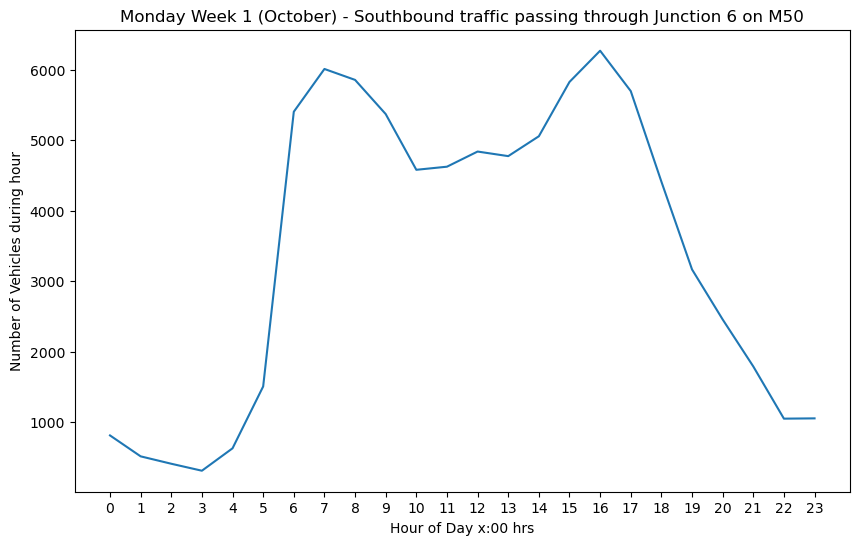

In [101]:
monday_wk1 = df.loc[(df['day'] == 'Mon') & (df['week'] == 1)]

plt.figure(figsize=(10,6))
plt.plot(monday_wk1['hour'], monday_wk1['southbound'])
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))      # separate x-axis into intervals of 1 hour rather than default interval of 5 hours
plt.ylabel('Number of Vehicles during hour')
plt.title('Monday Week 1 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()

To get a better sense of what Southbound traffic levels might be like on a typical Monday, we can create a plot of the average volume of traffic during each hour of Monday, calculated over the four Mondays of the sample dataset:

In [102]:
# First we create a dataframe consisting only of rows where the data in the 'day' column is 'Mon'.

monday = df.loc[df['day'] == 'Mon']

print(monday)

# Next we use the groupby() function on this 'monday' dataframe to seperate the data by the contents of the 'hour' column. 
# This creates 24 groups of data from the 'monday' dataframe
# We then use the .mean method on the 'southbound' column within each of these groups to calculate the mean value (over 4 weeks)
# for southbound traffic for each hour of each day.
mean_mon_s_hourly = monday.groupby('hour')['southbound'].mean()

print()
print('The average figure for southbound traffic passing through Junction 6 during each hour on a Monday is: ')
print(mean_mon_s_hourly)



     week  hour  day day_type  southbound  northbound
0       1     0  Mon  weekday         812         461
1       1     1  Mon  weekday         515         266
2       1     2  Mon  weekday         410         283
3       1     3  Mon  weekday         311         546
4       1     4  Mon  weekday         629        1018
..    ...   ...  ...      ...         ...         ...
523     4    19  Mon  weekday        3120        3266
524     4    20  Mon  weekday        2467        2094
525     4    21  Mon  weekday        1889        1475
526     4    22  Mon  weekday        1246        1066
527     4    23  Mon  weekday         842         753

[96 rows x 6 columns]

The average figure for southbound traffic passing through Junction 6 during each hour on a Monday is: 
hour
0      905.75
1      563.50
2      430.00
3      315.25
4      604.25
5     1558.75
6     5407.50
7     5915.75
8     5717.75
9     5250.50
10    4676.25
11    4685.75
12    4803.50
13    4922.25
14    4971.00
15    5798

Next, we can work out which hour of Monday has the highest average traffic level over the four weeks, and what that traffic level is. We can use the fact the indices of the output of mean_mon_s_hourly have the same numeric value as the hours which they relate to (eg. index [7] relates to the hour beginning at 7:00).

In [103]:
max_row_mon_s_hourly = mean_mon_s_hourly.idxmax()
max_value_mon_s_hourly = mean_mon_s_hourly.max()
print(f'The maximum average hourly figure for Southbound traffic on Mondays is {max_value_mon_s_hourly} and this occurs during the hour starting at {max_row_mon_s_hourly}:00')

The maximum average hourly figure for Southbound traffic on Mondays is 5915.75 and this occurs during the hour starting at 7:00


Next, we can plot this average hourly traffic for Southbound traffic measured over four consecutive Mondays in October:

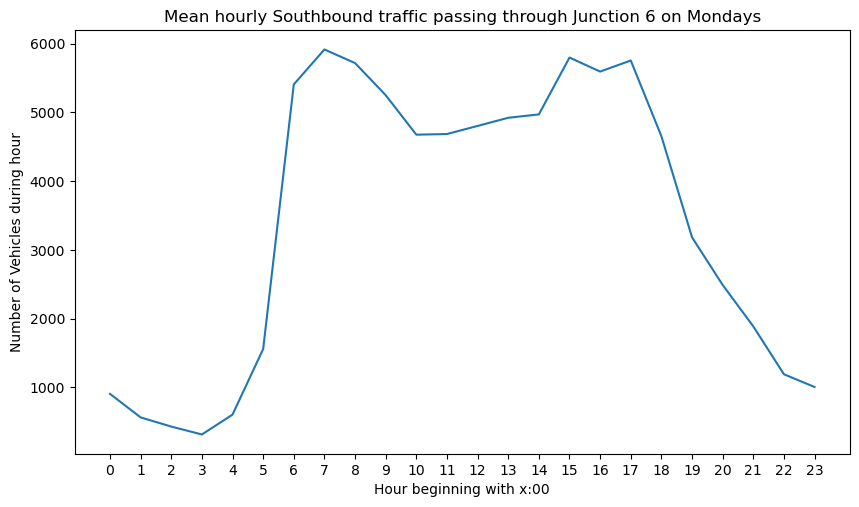

In [104]:
plt.figure(figsize=(10,5.5))   
plt.plot(mean_mon_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))      # seperate x-axis into 24 intervals rather than 5
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Mondays')
plt.show()

Next, we can plot the same kind of data but for Northbound traffic:

In [105]:
mean_mon_n_hourly = monday.groupby('hour')['northbound'].mean()

print()
print('The average figure for Northbound traffic passing through Junction 6 during each hour on a Monday is: ')
print(mean_mon_n_hourly)

max_row_mon_n_hourly = mean_mon_n_hourly.idxmax()
max_value_mon_n_hourly = mean_mon_n_hourly.max()
print()
print()
print(f'The maximum average hourly figure for Northbound traffic on Mondays is {max_value_mon_n_hourly} and this occurs during the hour starting at {max_row_mon_n_hourly}:00.')


The average figure for Northbound traffic passing through Junction 6 during each hour on a Monday is: 
hour
0      479.50
1      279.25
2      281.75
3      545.25
4     1049.75
5     1592.75
6     3802.75
7     5749.50
8     5920.50
9     5293.00
10    4761.50
11    4703.75
12    4784.75
13    5042.00
14    5111.25
15    5979.25
16    6019.75
17    5959.00
18    5103.75
19    3293.50
20    2114.75
21    1495.50
22    1070.00
23     722.75
Name: northbound, dtype: float64


The maximum average hourly figure for Northbound traffic on Mondays is 6019.75 and this occurs during the hour starting at 16:00.


I will now generate a plot of the average hourly northbound traffic for Mondays, including the plot for average hourly southbound traffic on the same graph to allow for an easier comparison:

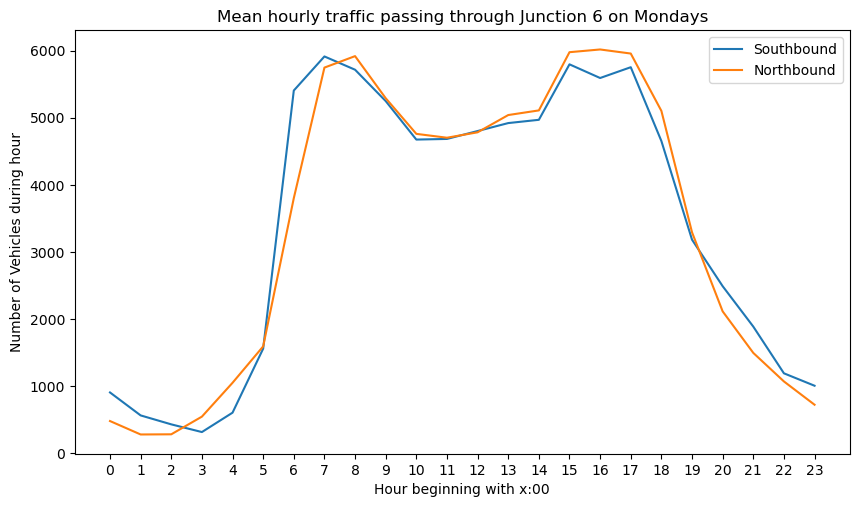

In [106]:
plt.figure(figsize=(10,5.5))
plt.plot(mean_mon_s_hourly, label = 'Southbound')
plt.plot(mean_mon_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Mondays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

This graph gives us a sense of which hours are the busiest and least busy on a Monday. To get a sense of how average traffic levels look for each other **weekday** we can plot similar graphs as the one above:

In [129]:
tuesday = df.loc[df['day'] == 'Tues']
wednesday = df.loc[df['day'] == 'Wed']
thursday = df.loc[df['day'] == 'Thurs']
friday = df.loc[df['day'] == 'Fri']
saturday = df.loc[df['day'] == 'Sat']
sunday = df.loc[df['day'] == 'Sun']

mean_tues_s_hourly = tuesday.groupby('hour')['southbound'].mean()
mean_wed_s_hourly = wednesday.groupby('hour')['southbound'].mean()
mean_thurs_s_hourly = thursday.groupby('hour')['southbound'].mean()
mean_fri_s_hourly = friday.groupby('hour')['southbound'].mean()
mean_sat_s_hourly = saturday.groupby('hour')['southbound'].mean()
mean_sun_s_hourly = sunday.groupby('hour')['southbound'].mean()

mean_tues_n_hourly = tuesday.groupby('hour')['northbound'].mean()
mean_wed_n_hourly = wednesday.groupby('hour')['northbound'].mean()
mean_thurs_n_hourly = thursday.groupby('hour')['northbound'].mean()
mean_fri_n_hourly = friday.groupby('hour')['northbound'].mean()
mean_sat_n_hourly = saturday.groupby('hour')['northbound'].mean()
mean_sun_n_hourly = sunday.groupby('hour')['northbound'].mean()

hour
0      936.25
1      849.25
2      393.50
3      242.00
4      346.00
5      507.50
6      817.75
7     1170.00
8     1840.75
9     3038.25
10    4044.75
11    4720.00
12    5376.75
13    5639.00
14    5271.25
15    5016.75
16    4948.75
17    4808.75
18    4659.00
19    3617.25
20    2659.50
21    1769.75
22    1447.00
23    1277.50
Name: southbound, dtype: float64


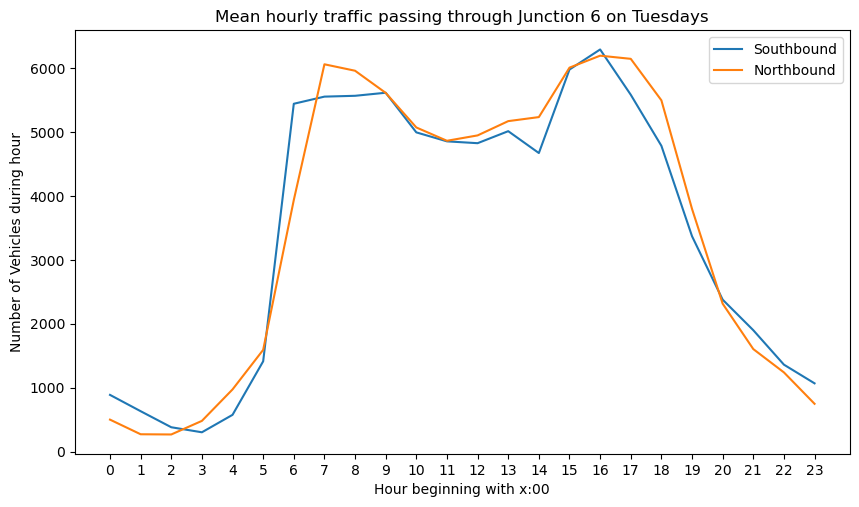

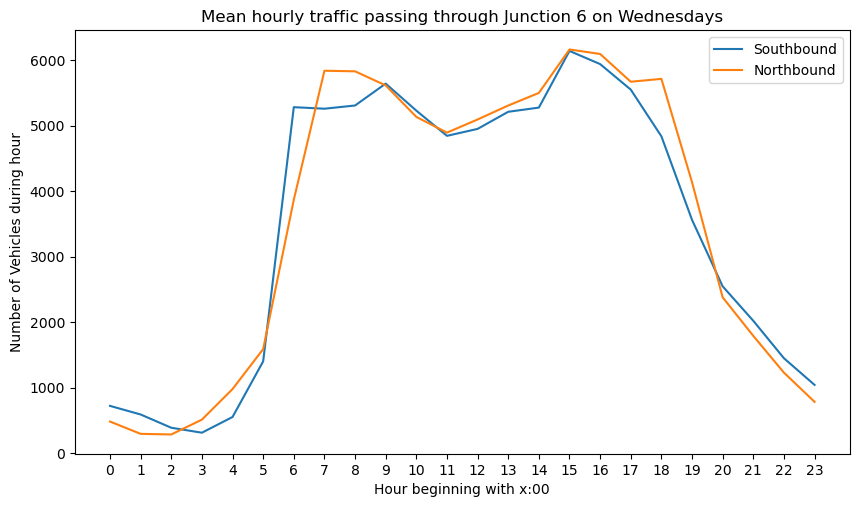

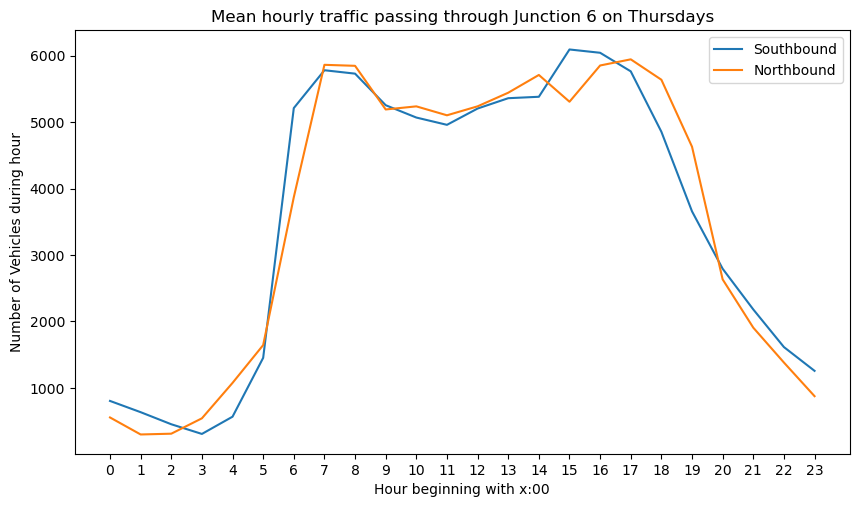

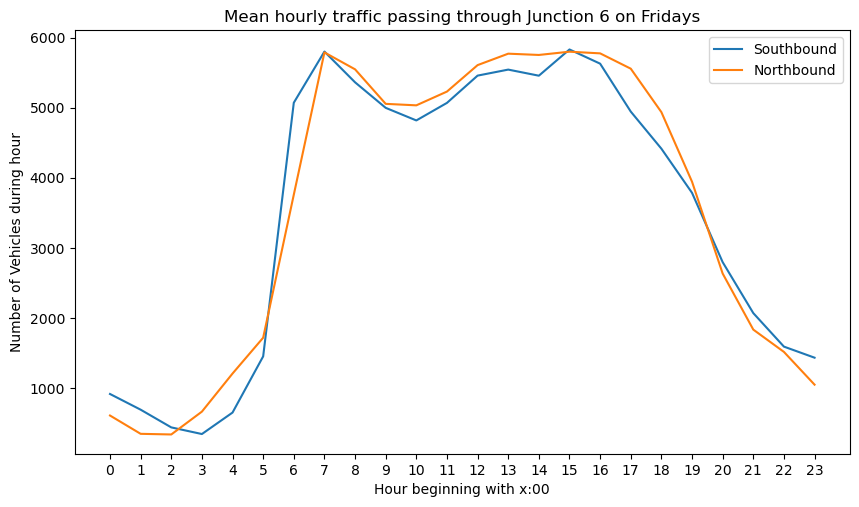

In [108]:
plt.figure(figsize=(10,5.5))
plt.plot(mean_tues_s_hourly, label = 'Southbound')
plt.plot(mean_tues_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))      
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Tuesdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(10,5.5))
plt.plot(mean_wed_s_hourly, label = 'Southbound')
plt.plot(mean_wed_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Wednesdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(10,5.5))
plt.plot(mean_thurs_s_hourly, label = 'Southbound')
plt.plot(mean_thurs_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))    
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Thursdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(10,5.5))
plt.plot(mean_fri_s_hourly, label = 'Southbound')
plt.plot(mean_fri_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))    
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Fridays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()



The distributions of hourly traffic for the two **weekend** days are as below:

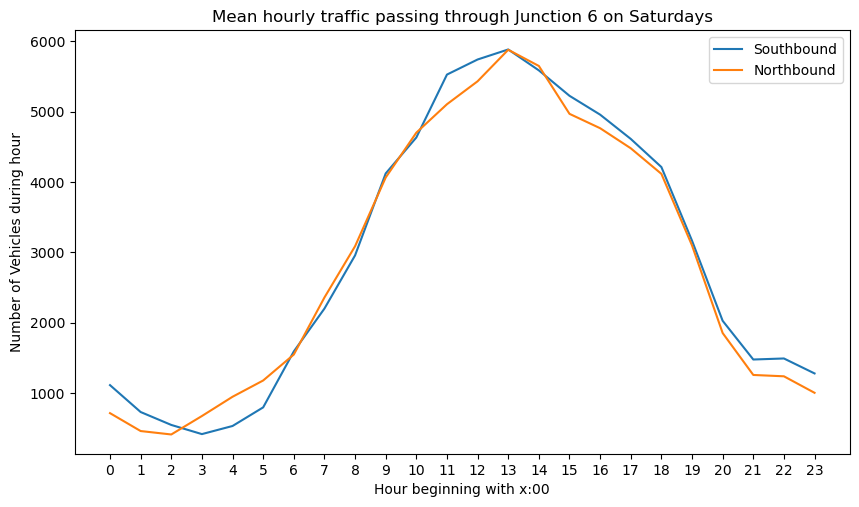

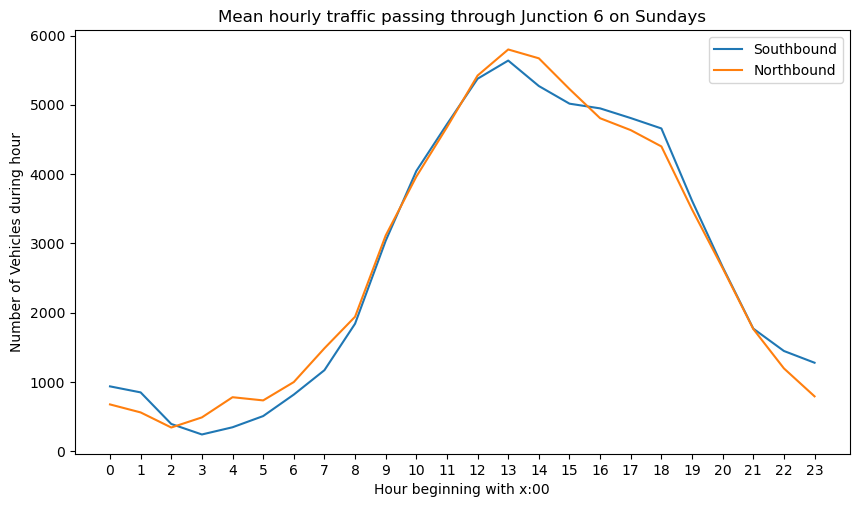

In [109]:
plt.figure(figsize=(10,5.5))
plt.plot(mean_sat_s_hourly, label = 'Southbound')
plt.plot(mean_sat_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Saturdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(10,5.5))
plt.plot(mean_sun_s_hourly, label = 'Southbound')
plt.plot(mean_sun_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Sundays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

As we did above for Monday's hourly data, we can get a sense of which hour is the busiest on average for each other day using the .max and .idxmax methods on the mean hourly data:

In [110]:
max_row_tues_s_hourly = mean_tues_s_hourly.idxmax()
max_value_tues_s_hourly = mean_tues_s_hourly.max()

max_row_tues_n_hourly = mean_tues_n_hourly.idxmax()
max_value_tues_n_hourly = mean_tues_n_hourly.max()

max_row_wed_s_hourly = mean_wed_s_hourly.idxmax()
max_value_wed_s_hourly = mean_wed_s_hourly.max()

max_row_wed_n_hourly = mean_wed_n_hourly.idxmax()
max_value_wed_n_hourly = mean_wed_n_hourly.max()

max_row_thurs_s_hourly = mean_thurs_s_hourly.idxmax()
max_value_thurs_s_hourly = mean_thurs_s_hourly.max()

max_row_thurs_n_hourly = mean_thurs_n_hourly.idxmax()
max_value_thurs_n_hourly = mean_thurs_n_hourly.max()

max_row_fri_s_hourly = mean_fri_s_hourly.idxmax()
max_value_fri_s_hourly = mean_fri_s_hourly.max()

max_row_fri_n_hourly = mean_fri_n_hourly.idxmax()
max_value_fri_n_hourly = mean_fri_n_hourly.max()

max_row_sat_s_hourly = mean_sat_s_hourly.idxmax()
max_value_sat_s_hourly = mean_sat_s_hourly.max()

max_row_sat_n_hourly = mean_sat_n_hourly.idxmax()
max_value_sat_n_hourly = mean_sat_n_hourly.max()

max_row_sun_s_hourly = mean_sun_s_hourly.idxmax()
max_value_sun_s_hourly = mean_sun_s_hourly.max()

max_row_sun_n_hourly = mean_sun_n_hourly.idxmax()
max_value_sun_n_hourly = mean_sun_n_hourly.max()

print(f'The maximum average hourly figure for Southbound traffic on Tuesdays is {max_value_tues_s_hourly} and this is expected to occur during the hour starting at {max_row_tues_s_hourly}:00')
print(f'The maximum average hourly figure for Southbound traffic on Wednesdays is {max_value_wed_s_hourly} and this is expected to occur during the hour starting at {max_row_wed_s_hourly}:00')
print(f'The maximum average hourly figure for Southbound traffic on Thursdays is {max_value_thurs_s_hourly} and this is expected to occur during the hour starting at {max_row_thurs_s_hourly}:00')
print(f'The maximum average hourly figure for Southbound traffic on Fridays is {max_value_fri_s_hourly} and this is expected to occur during the hour starting at {max_row_fri_s_hourly}:00')
print(f'The maximum average hourly figure for Southbound traffic on Saturdays is {max_value_sat_s_hourly} and this is expected to occur during the hour starting at {max_row_sat_s_hourly}:00')
print(f'The maximum average hourly figure for Southbound traffic on Sundays is {max_value_sun_s_hourly} and this is expected to occur during the hour starting at {max_row_sun_s_hourly}:00')
print()
print(f'The maximum average hourly figure for Northbound traffic on Tuesdays is {max_value_tues_n_hourly} and this is expected to occur during the hour starting at {max_row_tues_s_hourly}:00')
print(f'The maximum average hourly figure for Northbound traffic on Wednesdays is {max_value_wed_n_hourly} and this is expected to occur during the hour starting at {max_row_wed_s_hourly}:00')
print(f'The maximum average hourly figure for Northbound traffic on Thursdays is {max_value_thurs_n_hourly} and this is expected to occur during the hour starting at {max_row_thurs_s_hourly}:00')
print(f'The maximum average hourly figure for Northbound traffic on Fridays is {max_value_fri_n_hourly} and this is expected to occur during the hour starting at {max_row_fri_s_hourly}:00')
print(f'The maximum average hourly figure for Northbound traffic on Saturdays is {max_value_sat_n_hourly} and this is expected to occur during the hour starting at {max_row_sat_s_hourly}:00')
print(f'The maximum average hourly figure for Northbound traffic on Sundays is {max_value_sun_n_hourly} and this is expected to occur during the hour starting at {max_row_sun_s_hourly}:00')



The maximum average hourly figure for Southbound traffic on Tuesdays is 6293.75 and this is expected to occur during the hour starting at 16:00
The maximum average hourly figure for Southbound traffic on Wednesdays is 6143.25 and this is expected to occur during the hour starting at 15:00
The maximum average hourly figure for Southbound traffic on Thursdays is 6092.75 and this is expected to occur during the hour starting at 15:00
The maximum average hourly figure for Southbound traffic on Fridays is 5832.5 and this is expected to occur during the hour starting at 15:00
The maximum average hourly figure for Southbound traffic on Saturdays is 5881.75 and this is expected to occur during the hour starting at 13:00
The maximum average hourly figure for Southbound traffic on Sundays is 5639.0 and this is expected to occur during the hour starting at 13:00

The maximum average hourly figure for Northbound traffic on Tuesdays is 6196.5 and this is expected to occur during the hour starting a

We can see that at the broadest level of description, traffic in both directions during all five weekdays follows a roughly similar distribution: a first peak period between 6 am and 10 am, followed by a second peak period between 2 pm and 7 pm. 

Bearing in mind that the hours with the busiest traffic levels for Monday are 7:00 for Southbound (level is 5915.75 ) and 16:00 for Northbound (level is 6019.75), we can see that, in general:
- on weekdays, traffic levels peak between 3 and 5 pm, and peak traffic levels are slightly higher earlier in the week than later.
- on weekends, traffic levels peak at slightly lower levels than during the working week.

On Mondays, the busiest hour is between 7 and 8 am; perhaps this can be explained by additional people travelling back to Dublin for work and college on a Monday morning after having spent the weekend further away.

For weekends, we find a very different distribution than that found for weekdays; traffic on both days peaks during the hour of 13:00, which resonates with my past experiences of travelling to Blanchardstown shopping centre at this time. However, on Sunday evening we see a steadier fall off in the second half of the day; my guess is that this is due to people returning to their accomodation in Dublin following the weekend spent down the country etc.

### Correlations between Southbound and Northbound traffic ###

In [116]:
std_mon_s_hourly = monday.groupby('hour')['southbound'].std()
print(std_mon_s_hourly)

hour
0       71.121375
1       53.319790
2       34.756294
3       15.585784
4       25.184321
5       51.292462
6       39.110953
7       92.791433
8      229.039116
9      298.221953
10     192.144694
11      83.969737
12      80.967071
13     113.485315
14      79.086451
15      40.816663
16    1099.581852
17     304.169224
18     446.802995
19      60.785826
20      32.263240
21      79.629873
22      97.984267
23     109.462322
Name: southbound, dtype: float64


Similar statistics for standard deviation can be calculated for hourly Southbound and Northbound traffic for each of the seven days of the week, over the four weeks studied; the code for calculating these (without printing) is as below:

In [131]:
std_tues_s_hourly = tuesday.groupby('hour')['southbound'].std()
std_wed_s_hourly = wednesday.groupby('hour')['southbound'].std()
std_thurs_s_hourly = thursday.groupby('hour')['southbound'].std()
std_fri_s_hourly = friday.groupby('hour')['southbound'].std()
std_sat_s_hourly = saturday.groupby('hour')['southbound'].std()
std_sun_s_hourly = sunday.groupby('hour')['southbound'].std()

std_mon_n_hourly = monday.groupby('hour')['northbound'].std()
std_tues_n_hourly = tuesday.groupby('hour')['northbound'].std()
std_wed_n_hourly = wednesday.groupby('hour')['northbound'].std()
std_thurs_n_hourly = thursday.groupby('hour')['northbound'].std()
std_fri_n_hourly = friday.groupby('hour')['northbound'].std()
std_sat_n_hourly = saturday.groupby('hour')['northbound'].std()
std_sun_n_hourly = sunday.groupby('hour')['northbound'].std()

hour
0      45.250230
1     257.053010
2     127.972653
3      23.151674
4      35.505868
5      27.549955
6      22.765105
7     101.004950
8     268.300050
9     443.434606
10    526.278364
11    424.819177
12    148.124666
13    319.308628
14    116.665833
15    217.617976
16    337.566166
17    429.835918
18    541.841305
19    505.660212
20    373.501004
21    210.482580
22     90.807489
23    129.381864
Name: southbound, dtype: float64


We can get a picture of just how highly correlated southbound and northbound traffic volums are by using the np.corrcoef function. Here we find an almost perfect correlation of 0.977 ie. whatever the volume of traffic is going in one direction, there tends to be a similar volume of traffic going in the other direction also.

In [132]:
# Here I used [0,1] at

corr_s_n = np.corrcoef(df['southbound'], df['northbound'])[0,1]
print(corr_s_n)

[[1.         0.97768215]
 [0.97768215 1.        ]]


In [128]:
morning_rush = df.loc[(df['hour'] >= 6) & (df['hour'] <= 8) & (df['day'].isin(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']))]
evening_rush = df.loc[(df['hour'] >= 15) & (df['hour'] <= 18) & (df['day'].isin(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']))]

southbound_am_mean = morning_rush.groupby('day')['southbound'].mean()
northbound_pm_mean = evening_rush.groupby('day')['northbound'].mean()

print(southbound_am_mean)
print()
print(northbound_pm_mean)

corr_rush_hour = np.corrcoef(southbound_am_mean, northbound_pm_mean)[0,1]

print(corr_rush_hour)

day
Mon      5680.333333
Tues     5522.833333
Wed      5285.666667
Thurs    5573.333333
Fri      5413.000000
Sat              NaN
Sun              NaN
Name: southbound, dtype: float64

day
Mon      5765.4375
Tues     5962.7500
Wed      5913.2500
Thurs    5684.9375
Fri      5518.6250
Sat            NaN
Sun            NaN
Name: northbound, dtype: float64
nan


### Distribution of traffic for one hour over a week ###

I will now create plots to analyse how traffic levels during one hour of the day are distributed over the course of a week. I will choose the hour beginning at 07:00 for this and will start by analysing Southbound traffic levels at this hour for Week 1.

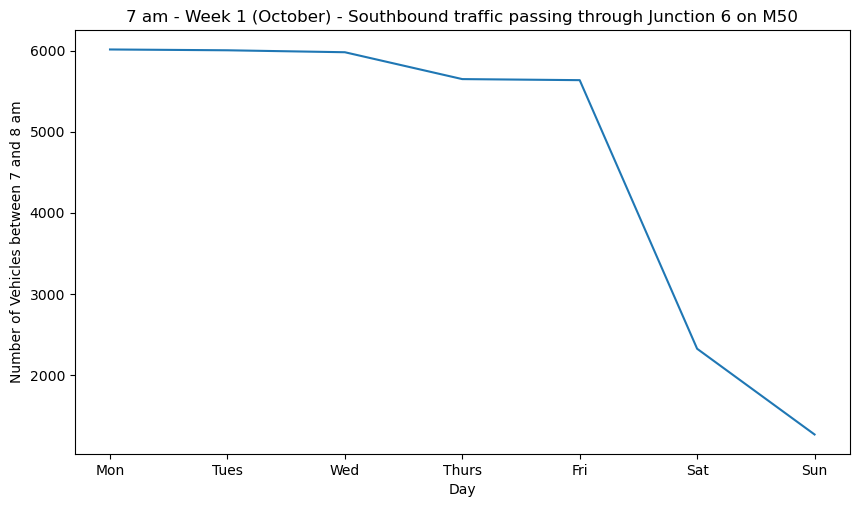

In [111]:
week1_7am = df.loc[(df['week'] == 1) & (df['hour'] == 7)]

plt.figure(figsize=(10,5.5))
plt.plot(week1_7am['day'], week1_7am['southbound'])
plt.xlabel('Day')
plt.ylabel('Number of Vehicles between 7 and 8 am')
plt.title('7 am - Week 1 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()

I will now analyse the same data but taking the average values over the four weeks in the sample:

In [112]:
am7 = df.loc[df['hour'] == 7]

print(am7)

     week  hour    day day_type  southbound  northbound
7       1     7    Mon  weekday        6013        5910
31      1     7   Tues  weekday        6003        6206
55      1     7    Wed  weekday        5979        6033
79      1     7  Thurs  weekday        5648        5733
103     1     7    Fri  weekday        5635        5877
127     1     7    Sat  weekend        2326        2410
151     1     7    Sun  weekend        1270        1520
175     2     7    Mon  weekday        5831        5904
199     2     7   Tues  weekday        5004        6024
223     2     7    Wed  weekday        5510        5612
247     2     7  Thurs  weekday        5844        5981
271     2     7    Fri  weekday        5835        5629
295     2     7    Sat  weekend        2303        2369
319     2     7    Sun  weekend        1096        1356
343     3     7    Mon  weekday        5977        5878
367     3     7   Tues  weekday        5642        6030
391     3     7    Wed  weekday        4857     

In [113]:
mean_7am_s = am7.groupby('day')['southbound'].mean()

print(mean_7am_s)

day
Mon      5915.75
Tues     5555.75
Wed      5261.50
Thurs    5780.25
Fri      5802.75
Sat      2200.25
Sun      1170.00
Name: southbound, dtype: float64


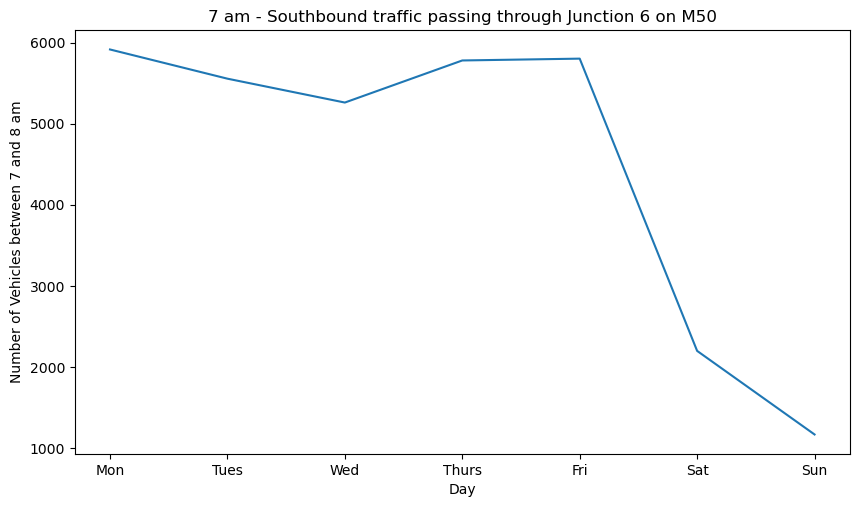

In [114]:
plt.figure(figsize=(10,5.5))
plt.plot(mean_7am_s)
plt.xlabel('Day')
plt.ylabel('Number of Vehicles between 7 and 8 am')
plt.title('7 am - Southbound traffic passing through Junction 6 on M50')
plt.show()

### Simulating data for a hypothetical week 5 ###

To create a synthetic dataset of weekly traffic data, I will use the mean and standard deviations for the hourly Southbound and Northbound data obtained above and use np.random to create a plausable set of datapoints for each day and hour.

I will then compare the distributions and properties of the synthetic dataset to the distributions obtained for the real data from Week 1 to Week 4.

I will first create synthetic hourly data for Monday Southbound traffic: to do this, I will generate a list of twenty-four normally distributed random numbers, each representing synthetic data for each hour.

In [148]:
mean_mon_s_hourly 
std_mon_s_hourly

np.random.seed(33)  
synth_mon_s_hourly = np.random.normal(loc=mean_mon_s_hourly, scale=std_mon_s_hourly, size=24)

# print(synthetic_mon_s_hourly)

df_synth_mon_s_hourly = pd.DataFrame({'hour': range(24), 'southbound': synth_mon_s_hourly, 'day': 'Mon'})

print(df_synth_mon_s_hourly)




    hour   southbound  day
0      0   883.072700  Mon
1      1   478.029413  Mon
2      2   376.641516  Mon
3      3   306.359855  Mon
4      4   598.791845  Mon
5      5  1571.823130  Mon
6      6  5401.654870  Mon
7      7  6102.333396  Mon
8      8  5695.582642  Mon
9      9  5376.409804  Mon
10    10  4632.928757  Mon
11    11  4632.182086  Mon
12    12  4802.181346  Mon
13    13  5040.753270  Mon
14    14  4885.200665  Mon
15    15  5707.961509  Mon
16    16  4548.306844  Mon
17    17  6008.614808  Mon
18    18  4207.353995  Mon
19    19  3204.627667  Mon
20    20  2540.129946  Mon
21    21  1942.701058  Mon
22    22   990.788557  Mon
23    23  1042.611516  Mon


Next, I will plot this synthetic ("Week 5") data alongside the actual Southbound hourly traffic data for Week 1 to see how the distributions compare:

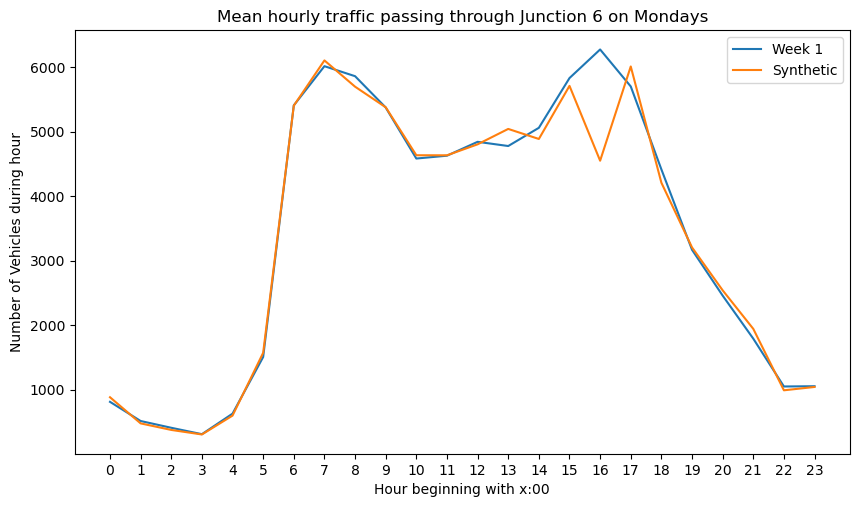

In [149]:
plt.figure(figsize=(10,5.5))
plt.plot(monday_wk1['hour'], monday_wk1['southbound'], label = 'Week 1 Southbound')
plt.plot(df_synth_mon_s_hourly['hour'], df_synth_mon_s_hourly['southbound'], label = 'Synthetic (Week 5) Southbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Mondays')
plt.legend(["Week 1", "Synthetic"], loc ="upper right")
plt.show()